# Analisis de datos sobre IRIS 
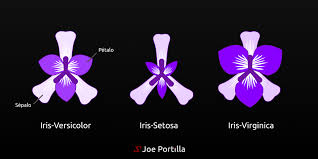

Estos conjuntos de datos consisten en 3 tipos diferentes de iris Setosa,Versicolor y Virginica) con longitud de pétalos y sépalos.

el conjunto de datos de la flor Iris o conjunto de datos del iris de Fisher es un conjunto de datos multivariante utilizado y hecho famoso por el estadisitico y biologo britanico ROnald Fischer en su articulo de 1936.
El uso de mediciones multiples en problemas taxonómicos como ejemplo discriminante lineal 

|Nombre Variable| Rol|Tipo| Descripción| Unidades| Missing|
|---|---|---|---|---|---|
|Sepal lenght| Feature|  Continua|   longitud del sépalo| cm| no|
|Sepal width|  Feature|  Continua|  anchura del sépalo | cm| no|
|petal length| Feature|  Continua|  longitud del sépalo |cm| no|
|petal width| Feature| Continua|  anchura del sépalo|cm| no|
|class      | Target| Categorica| Clase iris: Iris setosa,Iris Versicolour o Iris Virginica|0,1,2|no|

## Preparación y caga de datos

### Librerías 

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_iris


In [40]:
data=load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [41]:
variables= pd.DataFrame(data['data'],columns=data['feature_names']) # data era una matriz y feature names era un array y los junta para crear un dataframe 
variables.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [42]:
#queremos unirlo a frame asi que hay que crear una columna llenandolo con target 
variables['clase']= data['target']
variables.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clase
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [43]:
#queremos cambiar los nombres de 0 1 2 a el nombre del tipo de planta
data['target_names']
variables['clase'].replace({0:'setosa',1:'versicolor',2:'virginica'},inplace=True)
variables
# si tenemos muchisimos valores es mejor utilizar zip()
#zip(range(len(data)['target_names'])),data['target_names']
variables.to_parquet('iris.parquet',index=False) #para guardar los datos ya con las variables colocadas 

/var/folders/pq/mppvlq_j3_7b5gpr_bpc5khm0000gn/T/ipykernel_71843/3420697324.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  variables['clase'].replace({0:'setosa',1:'versicolor',2:'virginica'},inplace=True)


In [44]:
df=pd.read_parquet('iris.parquet') #cargarmos en dataframe y lo asignamos a una nueva variable 

### Verificación inicial 

In [45]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clase
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   clase              150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


se observa que no presenta Missing

In [47]:
df[df.duplicated(keep=False)] #si pones keep= false es para ver cual son los datos duplicados 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clase
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


el duplicado observado posiblemente sea por la precisión

### Observaciones:
1. No hay nulos 
2. Aunque hay duplicados podemos asumir que es por la escala o por la proporción
3. Los tipos de datos están correctos 



## Limpieza y prepocesado 

##### Prepocesado
**Feature engineer**

In [48]:
df['area sepal (cm2)'] = df['sepal length (cm)']*df['sepal width (cm)']
#np.prod(df.iloc[:,0:2],axis=1)

Se crean las columnas de area del petal y area del sepalo

In [49]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clase,area sepal (cm2)
0,5.1,3.5,1.4,0.2,setosa,17.85
1,4.9,3.0,1.4,0.2,setosa,14.70
2,4.7,3.2,1.3,0.2,setosa,15.04
3,4.6,3.1,1.5,0.2,setosa,14.26
4,5.0,3.6,1.4,0.2,setosa,18.00
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,20.10
146,6.3,2.5,5.0,1.9,virginica,15.75
147,6.5,3.0,5.2,2.0,virginica,19.50
148,6.2,3.4,5.4,2.3,virginica,21.08


In [54]:
# para mover todo a la derecha
    #clase= df.pop('clase')
    #pd.concat([df,clase], axis='columns')
    #esta es una opcion pero no es la más optima 
#esta opción esta bien si no tienes muchas columnas


In [60]:
df=df[['sepal length (cm)', 'sepal width (cm)', 'area sepal (cm2)','petal length (cm)','petal width (cm)','clase']]
df

,sepal length (cm),sepal width (cm),area sepal (cm2),petal length (cm),petal width (cm),clase
0,5.1,3.5,17.85,1.4,0.2,setosa
1,4.9,3.0,14.70,1.4,0.2,setosa
2,4.7,3.2,15.04,1.3,0.2,setosa
3,4.6,3.1,14.26,1.5,0.2,setosa
4,5.0,3.6,18.00,1.4,0.2,setosa
...,...,...,...,...,...,...
145,6.7,3.0,20.10,5.2,2.3,virginica
146,6.3,2.5,15.75,5.0,1.9,virginica
147,6.5,3.0,19.50,5.2,2.0,virginica
148,6.2,3.4,21.08,5.4,2.3,virginica


## observaciones
1.Se creó dos variables nuevas que representan el area del petalo

## Analisis descriptivo

In [61]:
df.describe()

,sepal length (cm),sepal width (cm),area sepal (cm2),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,17.822867,3.758000,1.199333
std,0.828066,0.435866,3.361854,1.765298,0.762238
min,4.300000,2.000000,10.000000,1.000000,0.100000
25%,5.100000,2.800000,15.660000,1.600000,0.300000
50%,5.800000,3.000000,17.660000,4.350000,1.300000
75%,6.400000,3.300000,20.325000,5.100000,1.800000
max,7.900000,4.400000,30.020000,6.900000,2.500000


In [62]:
#la clase no aparece por lo que hay que hacerlo de una manera distinta
df['clase'].value_counts(normalize=True)

clase
setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: proportion, dtype: float64

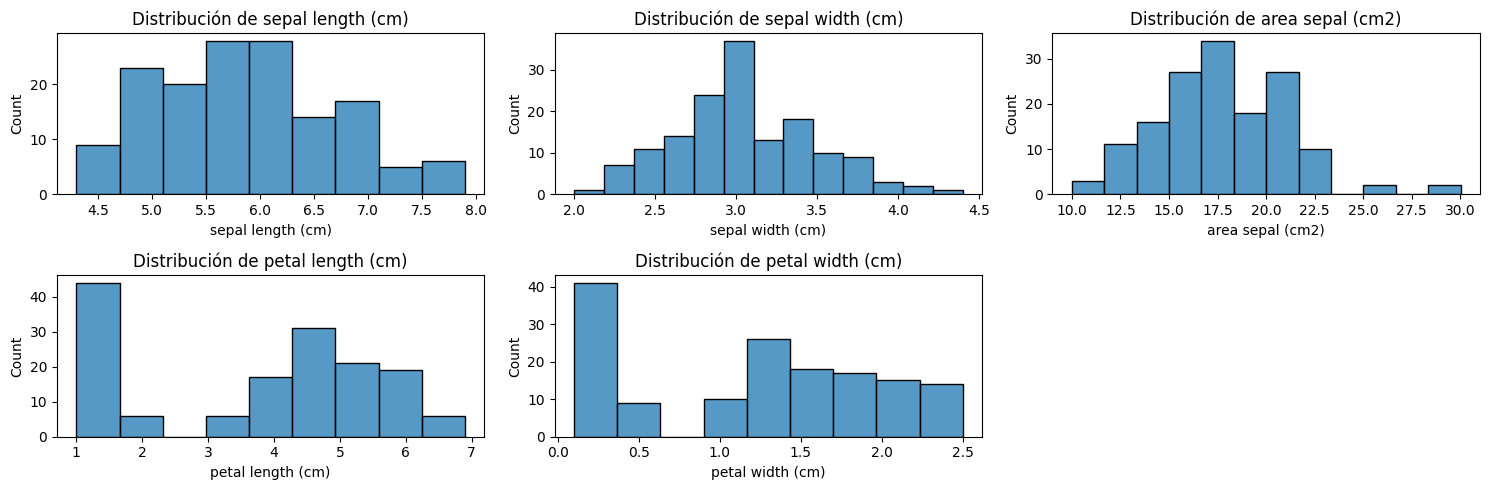

In [65]:
plt.figure(figsize=(15,5))
for i,feature in enumerate(df.select_dtypes(include='number').columns): # enumerate:pone un indice 
    plt.subplot(2,3,i+1)
    sns.histplot(data=df,x=feature)
    plt.title(f'Distribución de {feature}')

plt.tight_layout()
plt.show();